# Machine Learning Group Project Proposal:
# Predicting Electricity Supply and Demand


Team Members (alphabetical order):
-	Samarah Azimpoor
-	Safoura Janosepah
-	Vernon Naidoo
-	Jemisa Sadiku


1. Project/challenge Name
  -	Predicting Electricity Supply and Demand

2. Problem description - **Supervised Learning**
  -	Predict the electricity supply required to meet the demand
  -	Predict the demand from environmental and economic factors

3. Data format: tabular (csv), text, image, video, audio, etc
  - csv

4. Data size: number of records and features
  -	Number of records: ~44,000 records over five years
  -	Granularity: Hourly
  -	Features Under Consideration:
    -	Weather (mean Toronto temperature)
    -	Power demand (consumption)
    -	Region
    -	"Fuel Type" (Nuclear, Hydro, Wind, etc.)
    -	Industrial load by sector (under consideration)
    -	Day of the week
    -	Hour
    -	Public holiday indicator
    -	Electricity price category (On-peak, Mid-peak or Off-peak)
    -	Daylight indicator (by hour) 
    -	Population


5. Data source - link to data file
  -	Independent Electricity System Operator (IESO)
    -	http://reports.ieso.ca/public/GenOutputbyFuelHourly/ 
    -	http://reports.ieso.ca/public/DemandZonal/ 
    -	http://reports.ieso.ca/public/IndustrLoadBySector/ 
  -	Environment Canada
    -	https://climate.weather.gc.ca/historical_data/search_historic_data_e.html 
  -	Toronto Economy, Labour Force & Demographics
    -	https://www.toronto.ca/city-government/data-research-maps/toronto-economy-labour-force-demographics/ 


6. Link to the competition page
  - No competition.

7. Your motivation to work on this project
  - Personal interest in the transition to renewable sources of energy
  - Relevance to the economy and the environment of generating only as much power as needed without excess or shortage

# Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Supply Datasets (2017 - 2019) - Load, Join, Process
- Supply = Generator Output

## Load Supply Datasets

In [2]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/'

#2017 Hourly Generator Output File: 2017_Hourly_Output.csv
supply_2017 = pd.read_csv(path+'2017_Hourly_Output.csv', parse_dates=['Date'])
display(supply_2017.head(30))

#2018
supply_2018 = pd.read_csv(path+'2018_Hourly_Output.csv', parse_dates=['Date'])
display(supply_2018.head(3))

#2019
supply_2019 = pd.read_csv(path+'2019_Hourly_Output.csv', parse_dates=['Date'])
display(supply_2019.head(3))

,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2017-01-01,1,11592,234,2455,2433,0,1,16715
1,2017-01-01,2,11591,235,2523,1994,0,1,16344
2,2017-01-01,3,11596,234,2464,1647,0,1,15942
3,2017-01-01,4,11610,236,2494,1386,0,1,15727
4,2017-01-01,5,11611,235,2476,1330,0,1,15653
5,2017-01-01,6,11611,234,2471,1125,0,1,15442
6,2017-01-01,7,11609,235,2516,1136,0,1,15497
7,2017-01-01,8,11610,236,2675,1269,0,1,15791
8,2017-01-01,9,11609,236,2672,1095,21,1,15634
9,2017-01-01,10,11609,236,2952,1108,62,1,15968


,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2018-01-01,1,11671,1583,4152,992,0,3,18401
1,2018-01-01,2,11672,1192,4093,1124,0,1,18082
2,2018-01-01,3,11672,1040,4231,1265,0,0,18208


,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2019-01-01,1,11215,232,3320,1302,0,10,16079
1,2019-01-01,2,11221,233,3274,1146,0,10,15884
2,2019-01-01,3,11205,233,3222,992,0,10,15662


## Join Supply Datasets

In [3]:
supply = pd.concat([supply_2017, supply_2018, supply_2019])
display(supply.head(3))
supply.shape

,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2017-01-01,1,11592,234,2455,2433,0,1,16715
1,2017-01-01,2,11591,235,2523,1994,0,1,16344
2,2017-01-01,3,11596,234,2464,1647,0,1,15942


(26280, 9)

## Augment Supply Dataset

In [4]:
# Move Date column to index
supply = supply.set_index('Date')

# Add weekday column
supply['Day'] = supply.index.strftime('%A')
supply.head(3)

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday


## Plot Supply Data

In [5]:
# try: pivot by day; scatterplot
supply.loc[:,['Day','Total Output']]
supply.pivot_table(values='Total Output',columns='Day',index='Date').mean()
supply.pivot_table(values='Total Output', columns='Day',index='Date').mean()


Day
Friday       16794.080395
Monday       16776.684183
Saturday     16087.008547
Sunday       16003.719214
Thursday     16912.513622
Tuesday      16864.513800
Wednesday    16939.184562
dtype: float64

In [6]:
'''df=hourly_s_and_d.copy()
df=df[df.Hour.between(1,6)]
sns.pairplot(x_vars=["Hour"], y_vars=["Total Output"], data=supply, hue="Day", height=10, aspect=3);

supply'''

'df=hourly_s_and_d.copy()\ndf=df[df.Hour.between(1,6)]\nsns.pairplot(x_vars=["Hour"], y_vars=["Total Output"], data=supply, hue="Day", height=10, aspect=3);\n\nsupply'

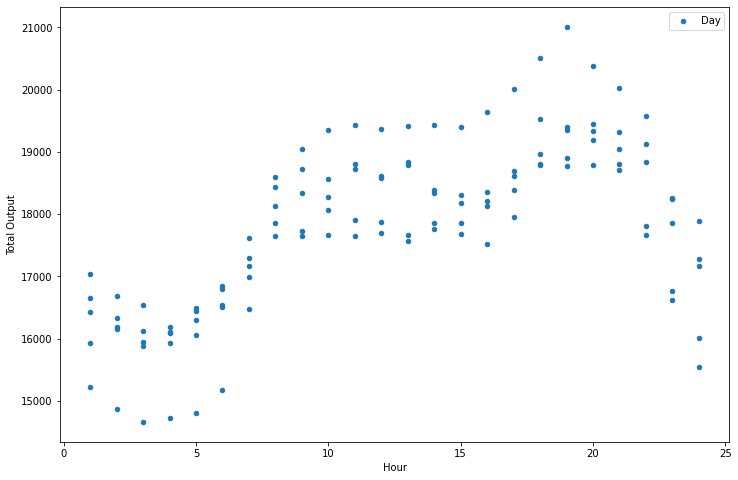

In [7]:
supply.loc['2019-02-04':'2019-02-08',['Hour','Total Output']].plot(figsize=(12,8), kind='scatter',x='Hour', y='Total Output',label='Day');

# Demand Datasets (2017 - 2019) - Load, Join, Process 

## Load Demand Datasets

In [8]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/'

#2017 Zonal Demand File: PUB_DemandZonal_2017.csv
demand_2017 = pd.read_csv(path+'PUB_DemandZonal_2017.csv', skiprows=3, parse_dates=['Date'])
display(demand_2017.head(3))

#2018
demand_2018 = pd.read_csv(path+'PUB_DemandZonal_2018.csv', skiprows=3, parse_dates=['Date'])
display(demand_2018.head(3))

#2019
demand_2019 = pd.read_csv(path+'PUB_DemandZonal_2019.csv', skiprows=3, parse_dates=['Date'])
display(demand_2019.head(3))

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
1,2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2,2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2018-01-01,1,16627,591,1466,1066,1268,5340,1579,89,3157,477,1489,16522,-105
1,2018-01-01,2,16084,577,1420,985,1300,5211,1516,91,3061,462,1465,16086,2
2,2018-01-01,3,15866,613,1417,943,1316,5096,1471,86,3032,446,1441,15862,-4


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2019-01-01,1,13198,616,1276,923,900,4617,908,67,2521,367,1190,13384,186
1,2019-01-01,2,12737,609,1301,899,865,4437,870,65,2425,353,1161,12986,249
2,2019-01-01,3,12531,602,1347,869,841,4315,830,63,2380,342,1140,12729,198


## Join Demand Datasets

In [9]:
demand = pd.concat([demand_2017, demand_2018, demand_2019])
display(demand.head(3))
demand.shape

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
1,2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2,2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"


(26280, 15)

## Extend Hourly Dataset

Original info:
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            26280 non-null  datetime64[ns]
 1   Hour            26280 non-null  int64         
 2   Ontario Demand  26280 non-null  int64         
 3   Northwest       26280 non-null  int64         
 4   Northeast       26280 non-null  int64         
 5   Ottawa          26280 non-null  int64         
 6   East            26280 non-null  int64         
 7   Toronto         26280 non-null  int64         
 8   Essa            26280 non-null  int64         
 9   Bruce           26280 non-null  int64         
 10  Southwest       26280 non-null  int64         
 11  Niagara         26280 non-null  int64         
 12  West            26280 non-null  int64         
 13  Zone Total      26280 non-null  int64         
 14  Diff            26280 non-null  object        
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 3.2+ MB
```



In [10]:
#demand.Date.
#demand.set_index('Date')
print(demand.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            26280 non-null  datetime64[ns]
 1   Hour            26280 non-null  int64         
 2   Ontario Demand  26280 non-null  int64         
 3   Northwest       26280 non-null  int64         
 4   Northeast       26280 non-null  int64         
 5   Ottawa          26280 non-null  int64         
 6   East            26280 non-null  int64         
 7   Toronto         26280 non-null  int64         
 8   Essa            26280 non-null  int64         
 9   Bruce           26280 non-null  int64         
 10  Southwest       26280 non-null  int64         
 11  Niagara         26280 non-null  int64         
 12  West            26280 non-null  int64         
 13  Zone Total      26280 non-null  int64         
 14  Diff            26280 non-null  object        
dtypes: 

In [11]:
#demand.set_index('Date',inplace=True)
#demand.head(5)

# Move Date column to index
demand = demand.set_index('Date')

# Add weekday column
demand['Day'] = demand.index.strftime('%A')
demand.head(3)

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Day
Date,,,,,,,,,,,,,,,
2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268",Sunday
2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673",Sunday
2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974",Sunday


## Demand Plots

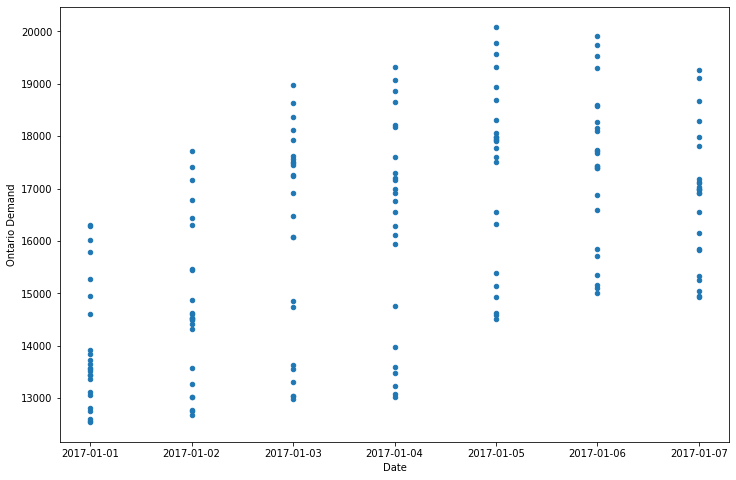

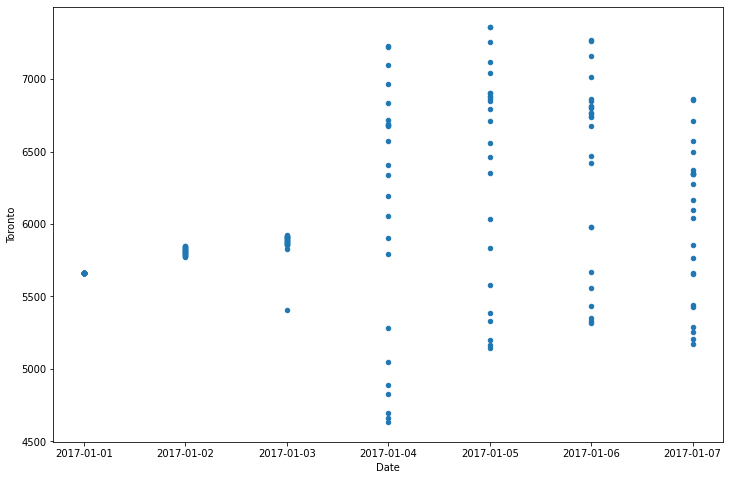

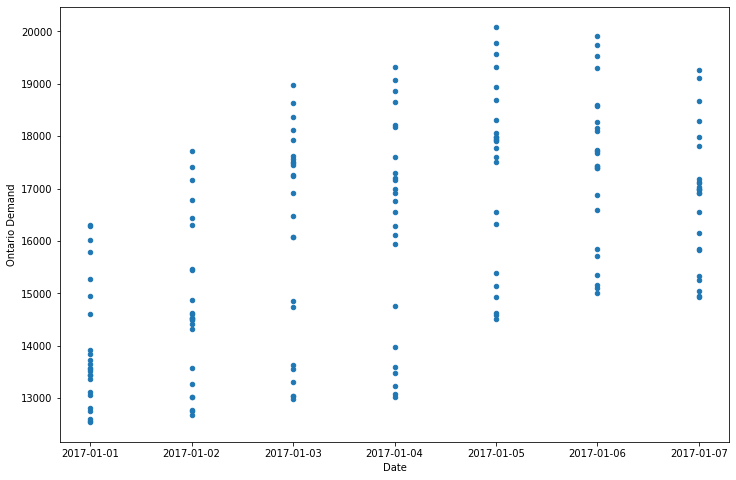

In [12]:
df = demand.loc['2017-01-01':'2017-01-07',['Ontario Demand','Toronto']].reset_index()
df.plot(kind='scatter', x='Date', y='Ontario Demand', figsize=(12,8));
df.plot(kind='scatter', x='Date', y='Toronto', figsize=(12,8));
df.plot(kind='scatter', x='Date', y='Ontario Demand', figsize=(12,8));
#month

#quarter


# Merge Supply and Demand Datasets

## Merge Hourly (NEEDS WORK!)

In [13]:
display(supply.head(3))
print('supply shape:',supply.shape)
display(demand.head(3))
print('demand shape:',demand.shape)

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday


supply shape: (26280, 9)


,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Day
Date,,,,,,,,,,,,,,,
2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268",Sunday
2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673",Sunday
2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974",Sunday


demand shape: (26280, 15)


In [14]:
display(supply.head(3))
display(demand.head(3))

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday


,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Day
Date,,,,,,,,,,,,,,,
2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268",Sunday
2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673",Sunday
2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974",Sunday


## Merge Daily Summaries

In [15]:
# Preview the DataFrames:
display(supply.reset_index().set_index(['Date','Hour']).head(3))
print('supply shape:',supply.shape)
display(demand.reset_index().set_index(['Date','Hour']).head(3))
print('demand shape:',demand.shape)

NUCLEAR  GAS  HYDRO  ...  BIOFUEL  Total Output     Day
Date       Hour                       ...                               
2017-01-01 1       11592  234   2455  ...        1         16715  Sunday
           2       11591  235   2523  ...        1         16344  Sunday
           3       11596  234   2464  ...        1         15942  Sunday

[3 rows x 8 columns]

supply shape: (26280, 9)


Ontario Demand  Northwest  ...   Diff     Day
Date       Hour                             ...               
2017-01-01 1              13522        495  ...  2,268  Sunday
           2              13117        495  ...  2,673  Sunday
           3              12816        495  ...  2,974  Sunday

[3 rows x 14 columns]

demand shape: (26280, 15)


In [16]:
# Create a new DataFrame with supply and demand columns:
hourly_s_and_d = supply.reset_index()[['Date','Day','Hour','Total Output']].copy()
hourly_s_and_d['Demand']=demand.reset_index()['Ontario Demand']
hourly_s_and_d

,Date,Day,Hour,Total Output,Demand
0,2017-01-01,Sunday,1,16715,13522
1,2017-01-01,Sunday,2,16344,13117
2,2017-01-01,Sunday,3,15942,12816
3,2017-01-01,Sunday,4,15727,12605
4,2017-01-01,Sunday,5,15653,12563
...,...,...,...,...,...
26275,2019-12-31,Tuesday,20,18282,15909
26276,2019-12-31,Tuesday,21,17563,15198
26277,2019-12-31,Tuesday,22,16828,14678
26278,2019-12-31,Tuesday,23,16568,14136


## Plot Hourly Scatter

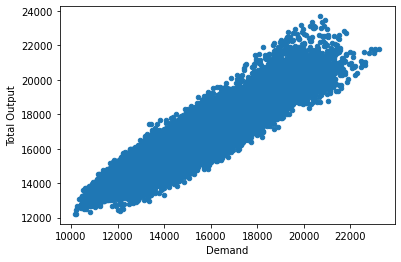

In [17]:
hourly_s_and_d.plot(kind='scatter',x='Demand',y='Total Output');

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday
2017-01-01,4,11610,236,2494,1386,0,1,15727,Sunday
2017-01-01,5,11611,235,2476,1330,0,1,15653,Sunday
...,...,...,...,...,...,...,...,...,...
2019-12-31,20,11462,232,3819,2735,0,34,18282,Tuesday
2019-12-31,21,11514,230,3719,2066,0,34,17563,Tuesday
2019-12-31,22,11605,229,3700,1260,0,34,16828,Tuesday


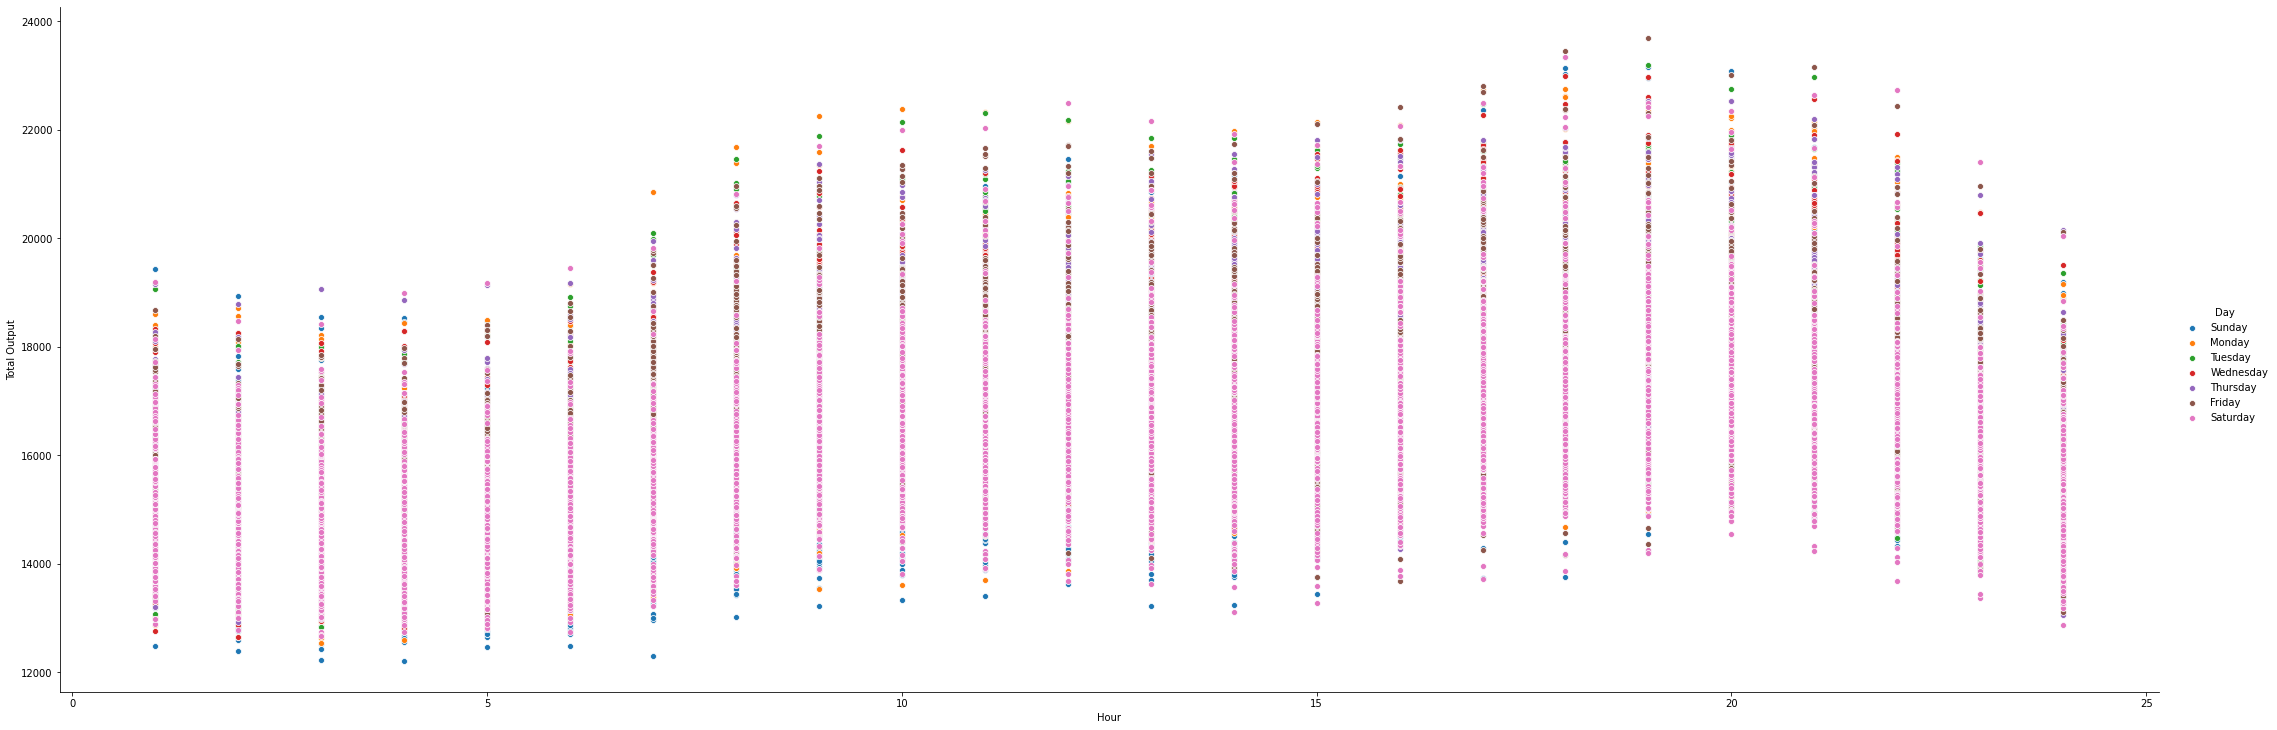

In [18]:
df=hourly_s_and_d.copy()
df=df[df.Hour.between(1,6)]
sns.pairplot(x_vars=["Hour"], y_vars=["Total Output"], data=supply, hue="Day", height=10, aspect=3);

supply

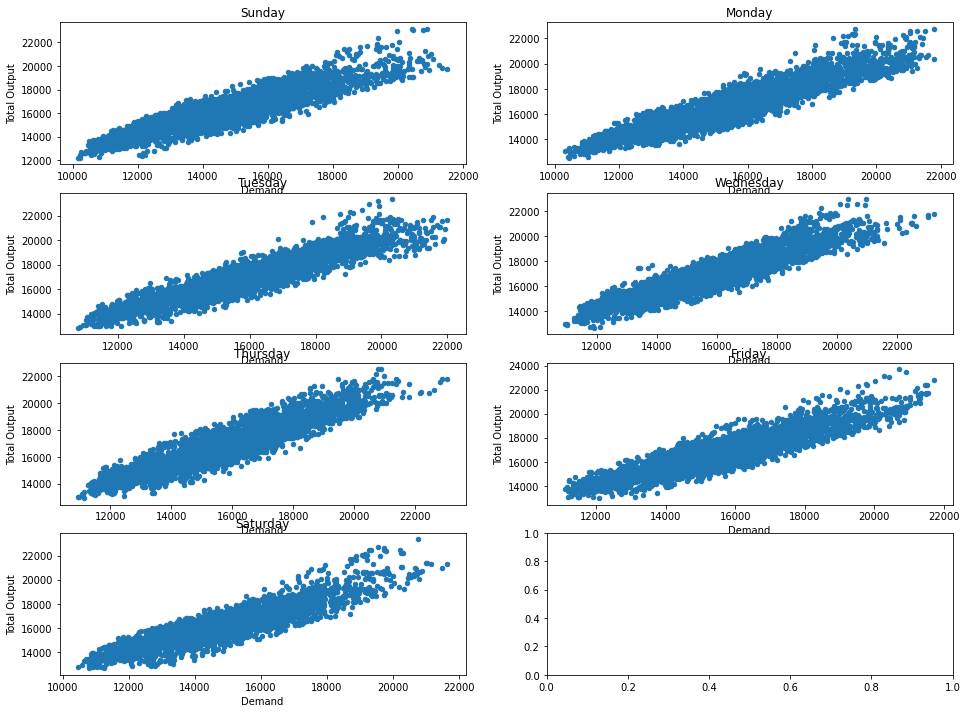

In [19]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((4, 2), (0, 0))
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax3 = plt.subplot2grid((4, 2), (1, 0))
ax4 = plt.subplot2grid((4, 2), (1, 1))
ax5 = plt.subplot2grid((4, 2), (2, 0))
ax6 = plt.subplot2grid((4, 2), (2, 1))
ax7 = plt.subplot2grid((4, 2), (3, 0))
ax8 = plt.subplot2grid((4, 2), (3, 1))

hourly_s_and_d[hourly_s_and_d.Day=='Sunday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax1,title='Sunday');
hourly_s_and_d[hourly_s_and_d.Day=='Monday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax2,title='Monday');
hourly_s_and_d[hourly_s_and_d.Day=='Tuesday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax3,title='Tuesday');
hourly_s_and_d[hourly_s_and_d.Day=='Wednesday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax4,title='Wednesday');

hourly_s_and_d[hourly_s_and_d.Day=='Thursday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax5,title='Thursday');
hourly_s_and_d[hourly_s_and_d.Day=='Friday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax6,title='Friday');
hourly_s_and_d[hourly_s_and_d.Day=='Saturday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax7,title='Saturday');

## Plot Daily Scatter

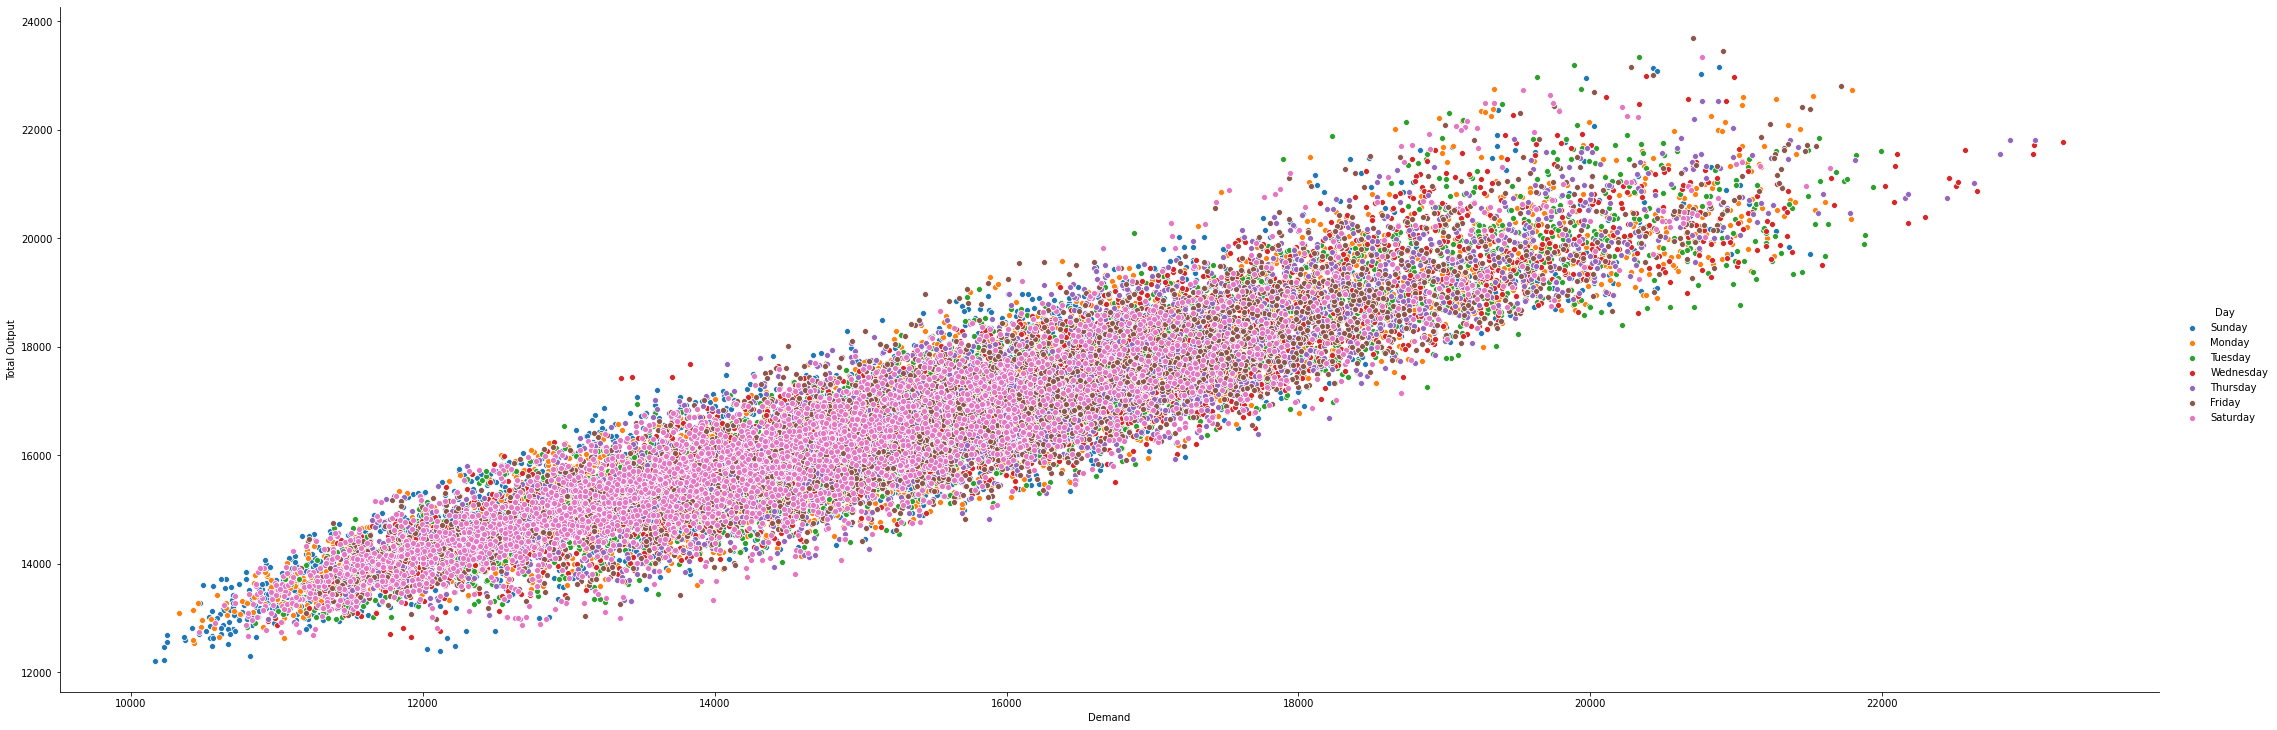

In [20]:
sns.pairplot(x_vars=["Demand"], y_vars=["Total Output"], data=hourly_s_and_d, hue="Day", height=10, aspect=3);

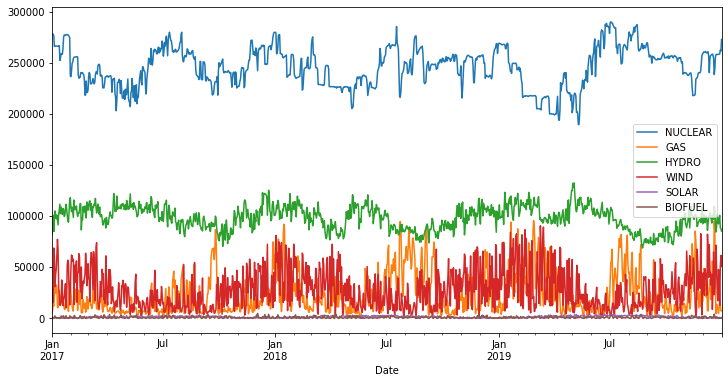

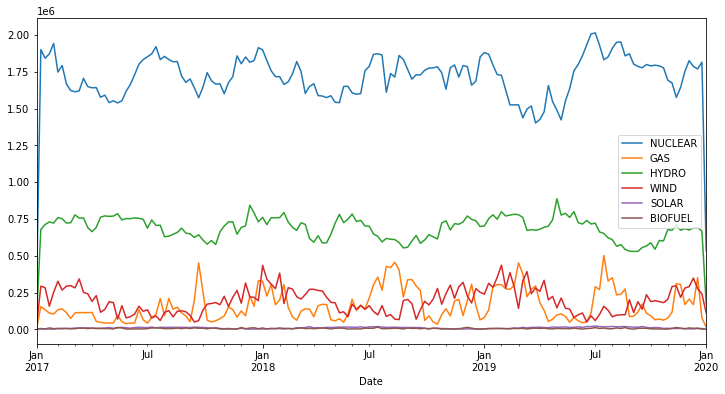

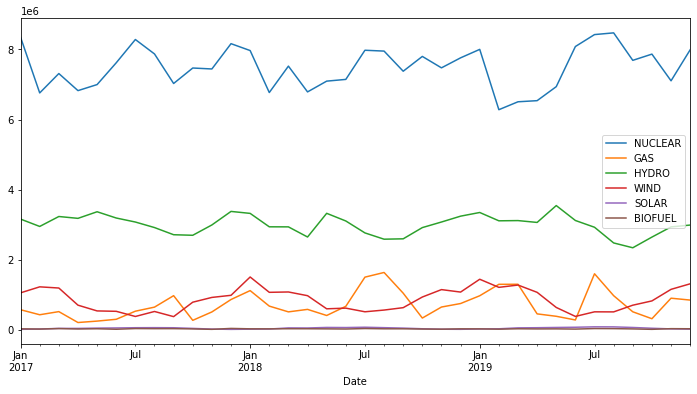

In [21]:
supply.resample('D').sum().loc[:,['NUCLEAR','GAS','HYDRO','WIND','SOLAR','BIOFUEL']].plot(figsize=(12,6));
supply.resample('W').sum().loc[:,['NUCLEAR','GAS','HYDRO','WIND','SOLAR','BIOFUEL']].plot(figsize=(12,6));
supply.resample('M').sum().loc[:,['NUCLEAR','GAS','HYDRO','WIND','SOLAR','BIOFUEL']].plot(figsize=(12,6));

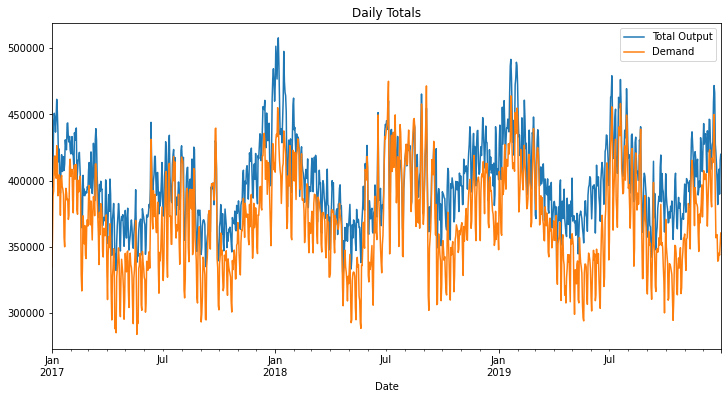

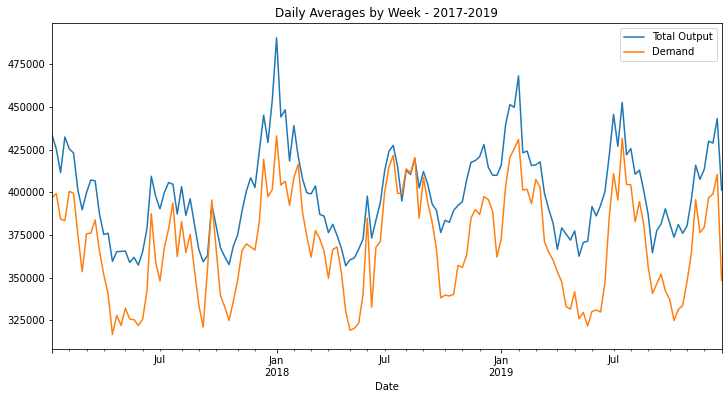

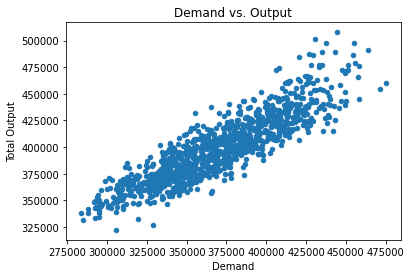

In [22]:
# Create daily summary:
daily_s_and_d = hourly_s_and_d.copy()
daily_s_and_d = daily_s_and_d.set_index('Date')
daily_s_and_d = daily_s_and_d[['Total Output', 'Demand']].resample('D').sum()

daily_s_and_d.plot(figsize=(12,6), title='Daily Totals');
daily_s_and_d.resample('W').mean()['2017-01-08':'2019-12-29'].plot(figsize=(12,6), title='Daily Averages by Week - 2017-2019');

daily_s_and_d.plot(kind='scatter',x='Demand',y='Total Output', title='Demand vs. Output');

# Weather Datasets

In [23]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/Weather Data/'

#2017 Weather File: en_climate_daily_ON_6158355_2017_P1D.csv
weather_2017 = pd.read_csv(path+'en_climate_daily_ON_6158355_2017_P1D.csv')#, skiprows=3, parse_dates=['Date'])
display(weather_2017.head(3))

#2018 Weather File: en_climate_daily_ON_6158355_2018_P1D.csv
weather_2018 = pd.read_csv(path+'en_climate_daily_ON_6158355_2018_P1D.csv')#, skiprows=3, parse_dates=['Date'])
display(weather_2018.head(3))

#2019 Weather File: en_climate_daily_ON_6158355_2019_P1D.csv
weather_2019 = pd.read_csv(path+'en_climate_daily_ON_6158355_2019_P1D.csv')#, skiprows=3, parse_dates=['Date'])
display(weather_2019.head(3))

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,NaN,-0.5,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,NaN,0.7,NaN,3.1,NaN,14.9,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,NaN,2.4,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,M,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2018-01-01,2018,1,1,NaN,-7.9,NaN,-18.6,NaN,-13.3,NaN,31.3,NaN,0.0,NaN,NaN,M,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2018-01-02,2018,1,2,NaN,-7.1,NaN,-12.5,NaN,-9.8,NaN,27.8,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,9.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2018-01-03,2018,1,3,NaN,-5.3,NaN,-11.2,NaN,-8.3,NaN,26.3,NaN,0.0,NaN,NaN,M,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2019-01-01,2019,1,1,NaN,6.3,NaN,-6.6,NaN,-0.1,NaN,18.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.4,NaN,0.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2019-01-02,2019,1,2,NaN,0.6,NaN,-8.2,NaN,-3.8,NaN,21.8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.9,NaN,0.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2019-01-03,2019,1,3,NaN,1.5,NaN,-0.6,NaN,0.5,NaN,17.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,5.0,NaN,NaN,M,NaN,M


In [24]:
weather = pd.concat([weather_2017, weather_2018, weather_2019])
display(weather.head(3))
weather.shape

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,NaN,-0.5,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,NaN,0.7,NaN,3.1,NaN,14.9,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,NaN,2.4,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,M,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M


(1095, 31)

# 2015

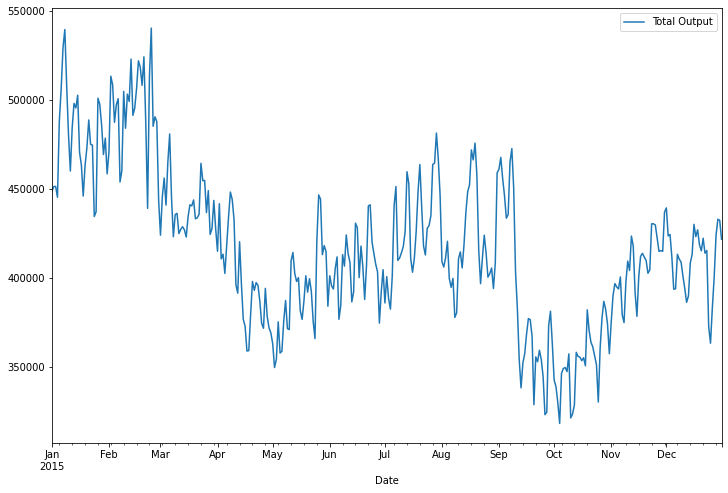

In [25]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/IESO-2015-a.csv'
df_2015 = pd.read_csv(path)
df_2015.Date = df_2015.Date.astype('datetime64')
daily_2015 = df_2015.set_index('Date').resample('D').sum()
daily_2015.loc[:,['Total Output']].plot(figsize=(12,8));

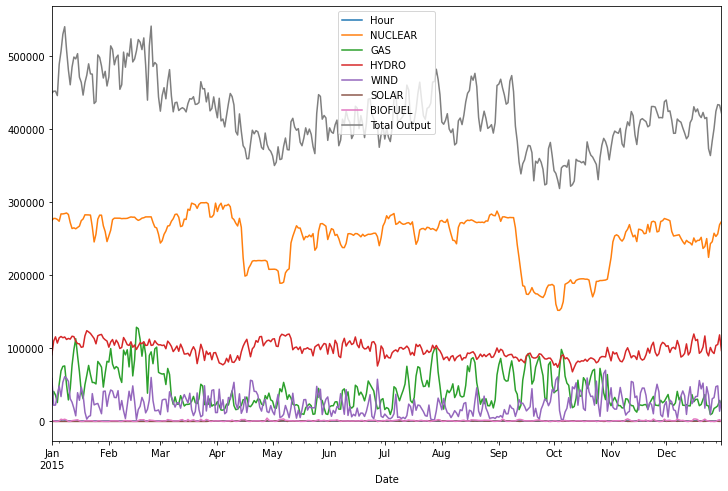

In [26]:
daily_2015.plot(figsize=(12,8));

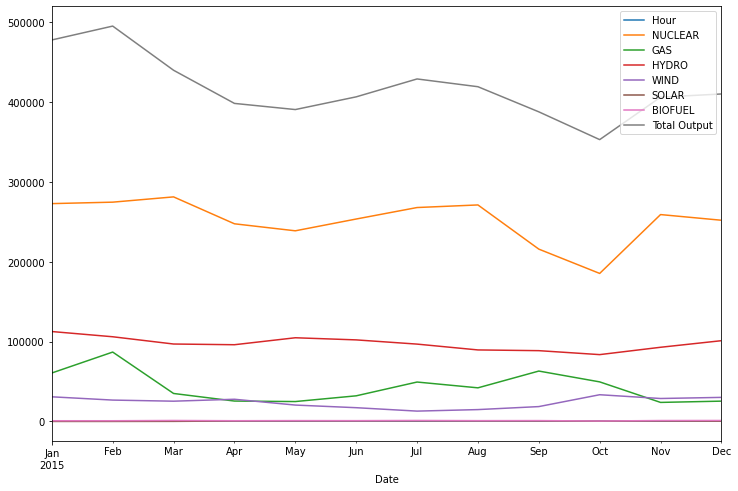

In [27]:
daily_2015.resample('M').mean().plot(figsize=(12,8));

In [28]:
print('CHECK 2015 FILE.  MAY NEED TO RECREATE.')
'''
path='/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/2015_Hourly_Demand.csv'
demand_2015 = pd.read_csv(path,skiprows=3)
demand_2015.Date = demand_2020.Date.astype('datetime64')
demand_2015.set_index('Date', inplace=True)
demand_2015.info()
demand_2015.head()
''';

CHECK 2015 FILE.  MAY NEED TO RECREATE.


# 2020

In [29]:
path='/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/2020_Hourly_Demand.csv'
demand_2020 = pd.read_csv(path,skiprows=3)#, delimiter='\\')
demand_2020.Date = demand_2020.Date.astype('datetime64')
demand_2020.set_index('Date', inplace=True)
demand_2020.info()
demand_2020.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2020-01-01 to 2020-07-27
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hour            5016 non-null   int64
 1   Market Demand   5016 non-null   int64
 2   Ontario Demand  5016 non-null   int64
dtypes: int64(3)
memory usage: 156.8 KB


,Hour,Market Demand,Ontario Demand
Date,,,
2020-01-01,1,16565,13219
2020-01-01,2,16193,12895
2020-01-01,3,16072,12554
2020-01-01,4,15930,12360
2020-01-01,5,15963,12353


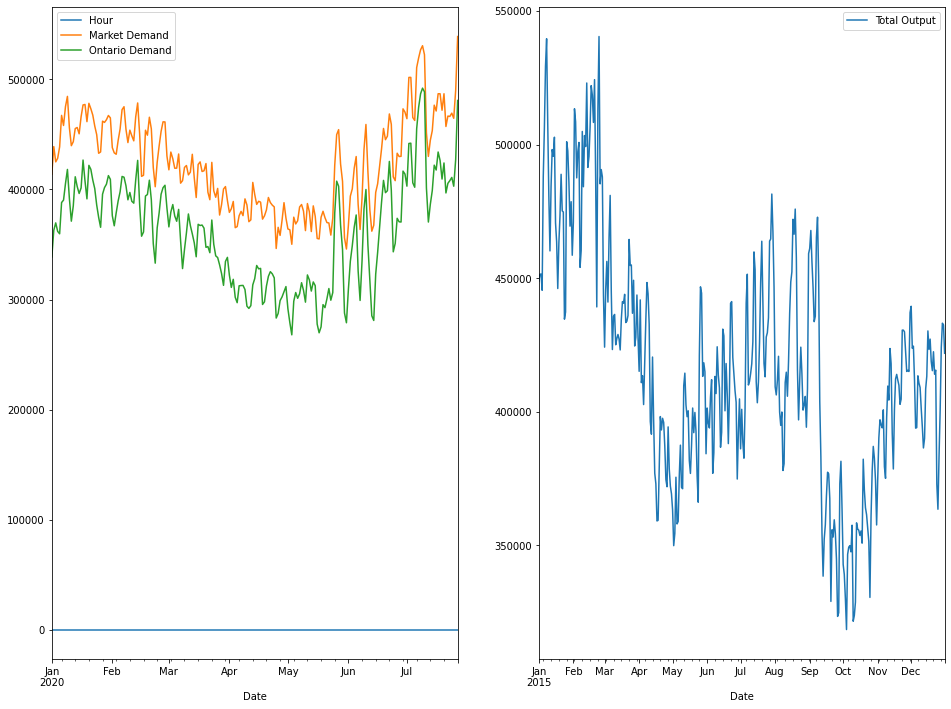

In [30]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

demand_2020.resample('D').sum().plot(ax=ax1);
daily_2015.loc[:,['Total Output']].plot(ax=ax2);
